# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# Build query URL
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
#lat = seattle_geo["results"][0]["geometry"]["location"]["lat"]
#lng = seattle_geo["results"][0]["geometry"]["location"]["lng"]

lat = []
lng = []
city_data =[]
city_count = 0



for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        lng = weather_json["coord"]["lon"]
        lat = weather_json["coord"]["lat"]
        temp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        windspeed = weather_json["wind"]["speed"]
        city_number = weather_json["id"]
        city_count += 1
        print(f" {city_count} {city_number} {city}")
        
        city_data.append({"city": city, "lng":lng,"lat":lat,"temp":temp,"humidity":humidity,"cloudiness":cloudiness,"windspeed":windspeed})
        
    except:
        type,value,traceback=sys.exc_info()
        print(type,value,traceback)
print(city_data)

        
    
            

 1 2206939 bluff
 2 1006984 east london
 3 2015852 svetlaya
 4 5866063 kenai
 5 3412093 vestmannaeyjar
 6 2138555 poum
 7 2094027 kieta
<class 'KeyError'> 'coord' <traceback object at 0x1a21ccc960>
 8 3985168 san patricio
 9 6167817 torbay
 10 4845585 westport
<class 'KeyError'> 'coord' <traceback object at 0x10c0498c0>
 11 3355672 luderitz
 12 3414079 olafsvik
 13 3372760 praia da vitoria
 14 4787534 sterling
 15 2163355 hobart
 16 2374583 bubaque
 17 187585 marsabit
 18 1623197 tual
 19 2315728 gemena
 20 3372707 ribeira grande
 21 2122104 petropavlovsk-kamchatskiy
 22 1254609 thenzawl
 23 478769 urdoma
 24 4034551 faanui
 25 2070998 geraldton
 26 778707 mehamn
 27 3366880 hermanus
 28 6201424 mataura
 29 2074865 carnarvon
 30 3369157 cape town
 31 5880054 barrow
 32 3446880 tapes
 33 7601762 bairiki
 34 964432 port alfred
 35 3423146 ilulissat
 36 5106841 albany
<class 'KeyError'> 'coord' <traceback object at 0x1a21cf1640>
 37 4020109 atuona
 38 2155415 new norfolk
 39 1129516 qarqi

 294 1732826 mersing
 295 2032614 baruun-urt
<class 'KeyError'> 'coord' <traceback object at 0x1a21cfdd20>
<class 'KeyError'> 'coord' <traceback object at 0x1a21cfd960>
 296 1215502 banda aceh
 297 236950 obo
 298 3985710 cabo san lucas
 299 3466980 caravelas
 300 2092164 lorengau
 301 2160735 lakes entrance
 302 5830007 lander
 303 1011918 danielskuil
 304 1687186 sarangani
 305 364027 wagar
 306 2021093 kuytun
 307 2020559 makkaveyevo
 308 3354077 opuwo
 309 86049 jalu
 310 1633419 padang
 311 3843123 neuquen
 312 1279945 jiuquan
 313 5563839 fortuna
 314 3372472 vila franca do campo
<class 'KeyError'> 'coord' <traceback object at 0x1a21d125f0>
 315 2234794 banyo
 316 2021017 kysyl-syr
<class 'KeyError'> 'coord' <traceback object at 0x1a21d0c0f0>
 317 3421765 nanortalik
 318 3671497 puerto colombia
 319 6179602 wetaskiwin
 320 2399371 makokou
 321 583358 aleksandro-nevskiy
 322 756046 wegrow
 323 5861897 fairbanks
 324 4013679 coahuayana
 325 3175096 lasa
 326 1714733 dingle
 327 149

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

city_data_df = pd.DataFrame(city_data)
city_data_df
##TODO: export city data into csv  
city_data_df.to_csv("../output_data/cities.csv",index_label="city")  

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

The code is displaying a scatter plot showing the latitude vs the maximum given temperature for 500+ randomly generated cities. As the cities get closer to the equator (0 latitude), the maximum temperature increases.  The correlation is pretty strong by the dense arc displayed with few visible outliers


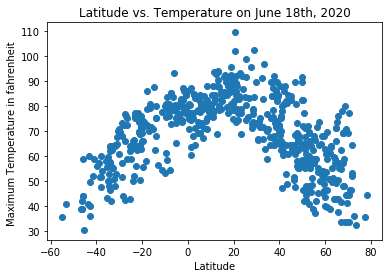

In [49]:


#sentence explaining what the code is analyzing
print("The code is displaying a scatter plot showing the latitude vs the maximum given temperature for 500+ randomly generated cities. As the cities get closer to the equator (0 latitude), the maximum temperature increases.  The correlation is pretty strong by the dense arc displayed with few visible outliers")
#add axis labels and titles

plt.scatter(city_data_df.loc[:,"lat"],city_data_df.loc[:,"temp"])
plt.title("Latitude vs. Temperature on June 18th, 2020")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature in fahrenheit ")
plt.show()


#### Latitude vs. Humidity Plot

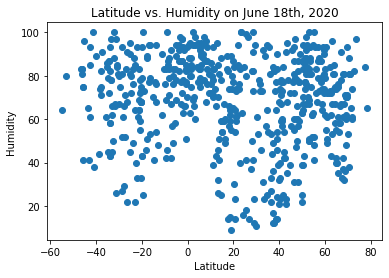

The code is displaying a scatter plot showing the latitude vs the humidity for 500+ randomly generated cities. There seems to be a slight correlation that the average humidity is above 50% near 0 degrees latitude.


In [51]:
plt.scatter(city_data_df.loc[:,"lat"],city_data_df.loc[:,"humidity"])
plt.title("Latitude vs. Humidity on June 18th, 2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity ")
plt.show()
print("The code is displaying a scatter plot showing the latitude vs the humidity for 500+ randomly generated cities. There seems to be a slight correlation that the average humidity is above 50% near 0 degrees latitude.") 

#### Latitude vs. Cloudiness Plot

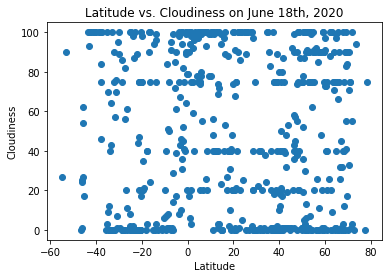

There seems to be no correlation between latitude and cloudiness


In [53]:
plt.scatter(city_data_df.loc[:,"lat"],city_data_df.loc[:,"cloudiness"])
plt.title("Latitude vs. Cloudiness on June 18th, 2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

print("There seems to be no correlation between latitude and cloudiness")

#### Latitude vs. Wind Speed Plot

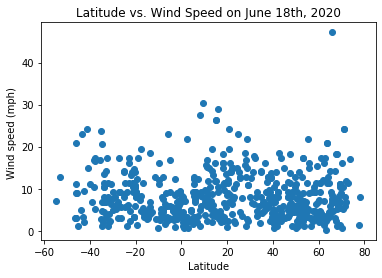

There is no visible correlation between latitude and windspeed, however there is one extreme outlier 


In [55]:
plt.scatter(city_data_df.loc[:,"lat"],city_data_df.loc[:,"windspeed"])
plt.title("Latitude vs. Wind Speed on June 18th, 2020")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph) ")
plt.show()

print("There is no visible correlation between latitude and windspeed, however there is one extreme outlier ")

## Linear Regression

In [54]:
# OPTIONAL: Create a function to create Linear Regression plots

  


In [10]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data_df.loc[(city_data_df["lat"]>=0)]
southern_df = city_data_df.loc[(city_data_df["lat"]<0)]

southern_df.head()


,city,lng,lat,temp,humidity,cloudiness,windspeed
0,bluff,168.33,-46.60,39.00,83,0,3.00
1,east london,27.91,-33.02,63.99,62,0,14.12
5,poum,164.02,-20.23,74.39,75,100,14.07
6,kieta,155.63,-6.22,78.76,80,0,3.18
10,luderitz,15.16,-26.65,75.20,22,0,9.17


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

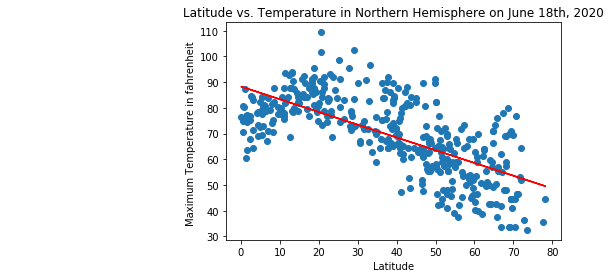

There is a strong negative correlation between latitude and maximum temperature in the Northern hemisphere.


In [56]:
plt.scatter(northern_df.loc[:,"lat"],northern_df.loc[:,"temp"])
plt.title("Latitude vs. Temperature in Northern Hemisphere on June 18th, 2020")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature in fahrenheit ")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df.loc[:,"lat"], northern_df.loc[:,"temp"])
regress_values = northern_df.loc[:,"lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_df.loc[:,"lat"],regress_values,"r-")
plt.annotate(line_eq,(-60,80),fontsize=15,color="red")
plt.show()

print("There is a strong negative correlation between latitude and maximum temperature in the Northern hemisphere.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

There is a strong positive correlation between latitude and maximum temperature in the southern hemisphere


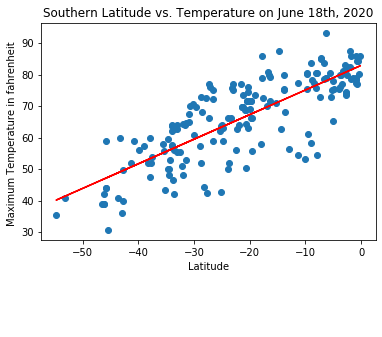

In [57]:
plt.scatter(southern_df.loc[:,"lat"],southern_df.loc[:,"temp"])
plt.title("Southern Latitude vs. Temperature on June 18th, 2020")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature in fahrenheit ")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df.loc[:,"lat"], southern_df.loc[:,"temp"])
regress_values = southern_df.loc[:,"lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_df.loc[:,"lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,0),fontsize=15,color="red")

print("There is a strong positive correlation between latitude and maximum temperature in the southern hemisphere")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

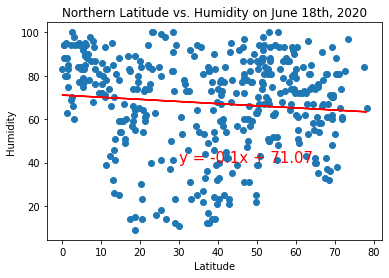

There is a very weak negative correlation between latitude and humidity in the northern hemisphere


In [58]:
plt.scatter(northern_df.loc[:,"lat"],northern_df.loc[:,"humidity"])
plt.title("Northern Latitude vs. Humidity on June 18th, 2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity ")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df.loc[:,"lat"], northern_df.loc[:,"humidity"])
regress_values = northern_df.loc[:,"lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_df.loc[:,"lat"],regress_values,"r-")
plt.annotate(line_eq,(30,40),fontsize=15,color="red")
plt.show()

print("There is a very weak negative correlation between latitude and humidity in the northern hemisphere")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There is a weak positive correlation between latitude and humidity in the southern hemisphere


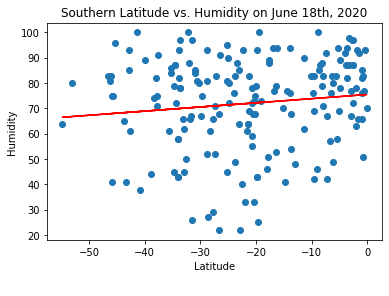

In [59]:
plt.scatter(southern_df.loc[:,"lat"],southern_df.loc[:,"humidity"])
plt.title("Southern Latitude vs. Humidity on June 18th, 2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df.loc[:,"lat"], southern_df.loc[:,"humidity"])
regress_values = southern_df.loc[:,"lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_df.loc[:,"lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,0),fontsize=15,color="red")

print("There is a weak positive correlation between latitude and humidity in the southern hemisphere")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

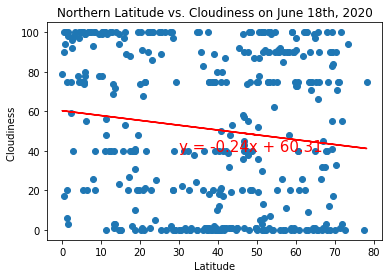

In [45]:
plt.scatter(northern_df.loc[:,"lat"],northern_df.loc[:,"cloudiness"])
plt.title("Northern Latitude vs. Cloudiness on June 18th, 2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness ")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df.loc[:,"lat"], northern_df.loc[:,"cloudiness"])
regress_values = northern_df.loc[:,"lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_df.loc[:,"lat"],regress_values,"r-")
plt.annotate(line_eq,(30,40),fontsize=15,color="red")
plt.show()

print("There is a negative correlation between latitude and cloudiness in the northern hemisphere")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

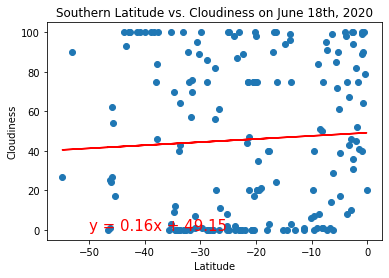

There is a positive correlation between latitude and cloudiness in the southern hemisphere


In [60]:
plt.scatter(southern_df.loc[:,"lat"],southern_df.loc[:,"cloudiness"])
plt.title("Southern Latitude vs. Cloudiness on June 18th, 2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df.loc[:,"lat"], southern_df.loc[:,"cloudiness"])
regress_values = southern_df.loc[:,"lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_df.loc[:,"lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,0),fontsize=15,color="red")
plt.show()


print("There is a positive correlation between latitude and cloudiness in the southern hemisphere")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

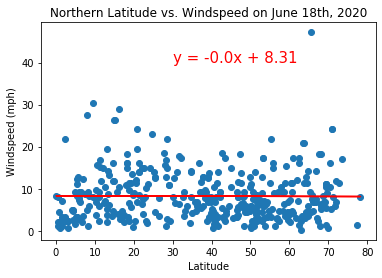

There is no correlation between latitude and windspeed in the northern hemisphere


In [61]:
plt.scatter(northern_df.loc[:,"lat"],northern_df.loc[:,"windspeed"])
plt.title("Northern Latitude vs. Windspeed on June 18th, 2020")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df.loc[:,"lat"], northern_df.loc[:,"windspeed"])
regress_values = northern_df.loc[:,"lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_df.loc[:,"lat"],regress_values,"r-")
plt.annotate(line_eq,(30,40),fontsize=15,color="red")
plt.show()


print("There is no correlation between latitude and windspeed in the northern hemisphere")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

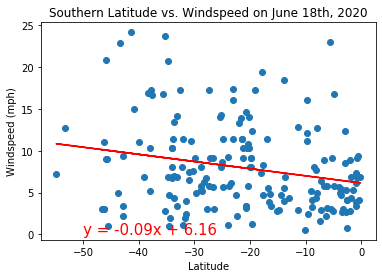

There is a negative correlation between latitude and cloudiness in the southern hemisphere


In [62]:
plt.scatter(southern_df.loc[:,"lat"],southern_df.loc[:,"windspeed"])
plt.title("Southern Latitude vs. Windspeed on June 18th, 2020")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df.loc[:,"lat"], southern_df.loc[:,"windspeed"])
regress_values = southern_df.loc[:,"lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_df.loc[:,"lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,0),fontsize=15,color="red")
plt.show()


print("There is a negative correlation between latitude and cloudiness in the southern hemisphere")